# Theory behid

The program is based on the theory developed by S. Adams and co-authors (see references)


The main concept is simple but for illustrative purpose the theory is explained on a toy example. Given an ionic structure with known formal charges of each atom. Say, it is a Na-containing compound and the question is what is the **Na ion** migration barriers in this structure. 

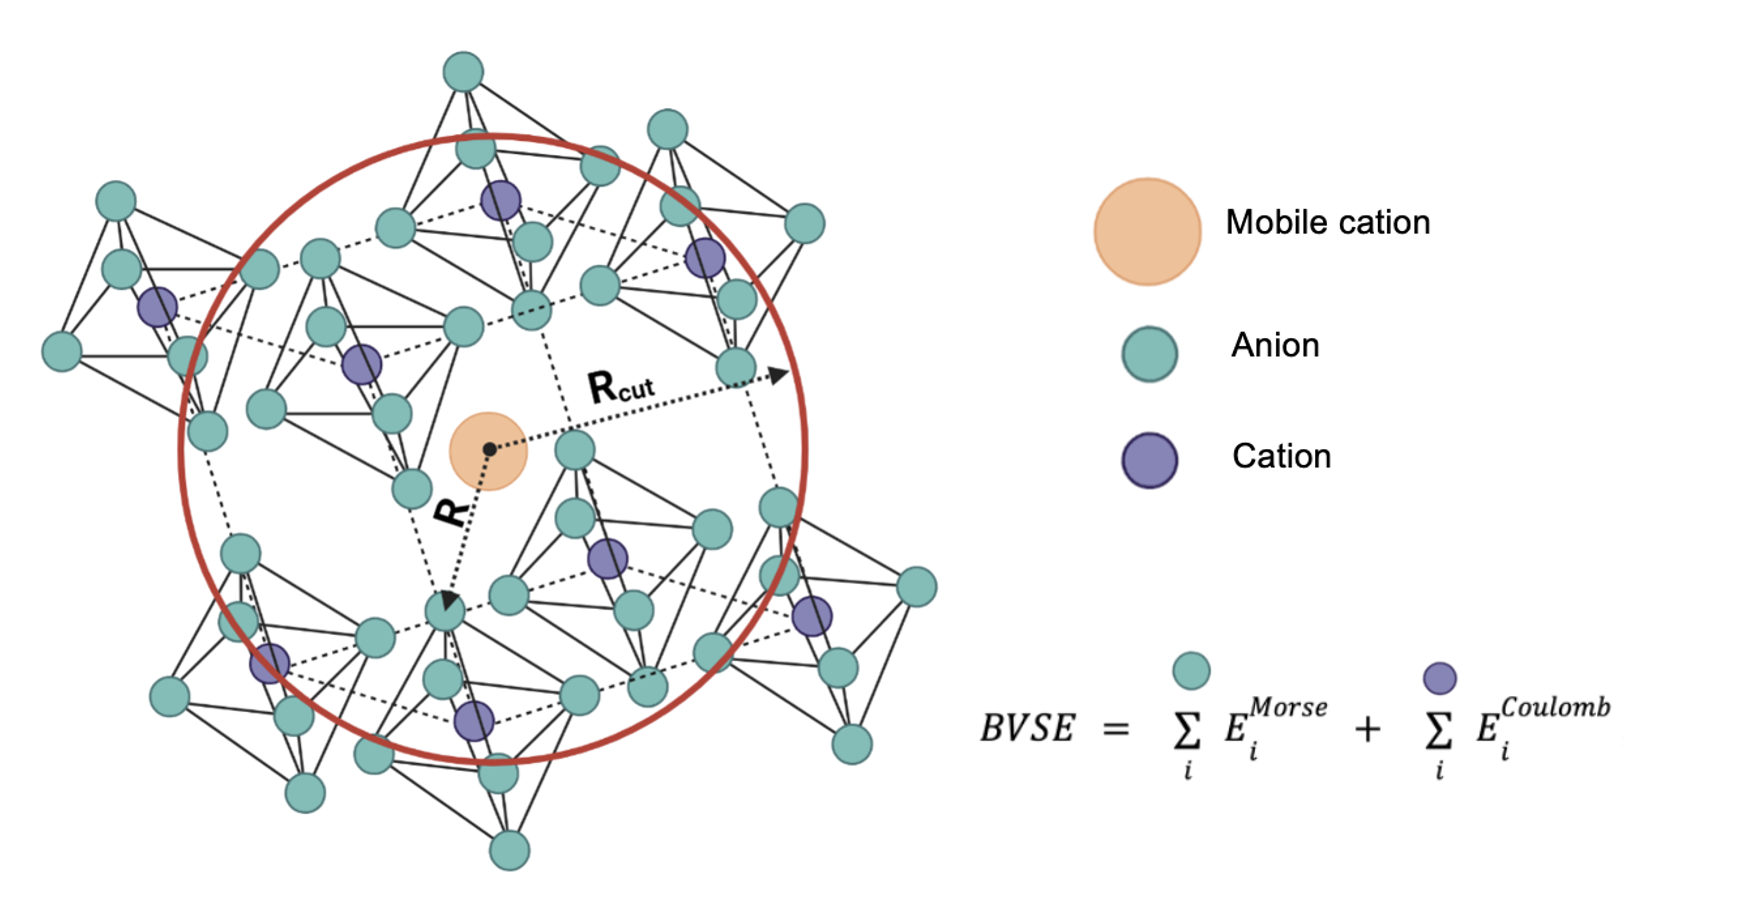

<center>Figure 1. Single point BVSE calculation</center> 

Let's:  

1) Remove all Na ions from the structure   
2) Put **Na ion** (test ion) in some point (x, y, z) within a unit cell of the structure (see fig. 1)  
3) Collect all nearest neighbors of this ion within a sphere of a given radius (**cutoff radius**) 
4) Calculate Morse-type interaction for neighbors heaving the opposite to test ion sign of formal charge 

$$
\begin{align}
  \tag{1}
   E_{Morse} = \sum_{i}^{anions} \frac{D_{0_i}}{2}\bigl([e^{\alpha_{i}{(R_{min_i} - R_i)}} - 1]^{2} -  1\bigl)
\end{align}
$$

 where $D_{0}, \alpha, R_{min}$ are tabulated constants (see references). $R$ is distance between the test ion and its neighbor.  


5) Calculate Coulombic interaction for neighbors heaving the same sign of formal charge as test ion (eq.2)  

$$
\begin{align}
  \tag{2}
  E_{Coulomb} = \sum_{i}^{cations} k\frac{\frac{VV_{i}}{\sqrt{nn{_i}}}}{R_i}\ erfc(\frac{R_i}{f(r + r_i)})
\end{align}
$$

 where $V, V_{i},n, n_{i} R, r, r_{i}$ are test ion oxidation state (valence), neighboring cation oxidation state, test ion principal quantum number, neighboring cation principal quantum number, distance between neighbors and their covalent radii, respectively. ${k}$ is  conversion factor from inverse length to eV



6) Sum these energies to get the bond valence site energy (BVSE) of the test ion (eq.3)  

$$
\begin{align}
  \tag{3}
  BVSE(x, y, z) = E_{Coulomb} + E_{Morse}
\end{align}
$$


7) Construct grid coordinates with equidistant spacing (**resolution**) within a unit cell  
8) Repeat steps 2-6 for each grid point  


We got the BVSE(x, y, z) **distribution** when steps #1-8 are finished (is done by ```Lain.bvse_distribution``` method)  

  
  
Now, by constructing **connected regions** of this distribution at a given **energy threshold** $E_{tr}$, i.e. detecting a connectivity within a set of (x, y, z) coordinates subject to $BVSE(x, y, z) < E_{tr}$, and iterating over different thresholds we can find the minimum energy value at which some connected region **percolates** through the unit cell. By percolation we mean that this region is infinite considering toroidal 3D topology (i. e. periodic boundary conditions). The difference between minimum energy within this region and the percolation threshold is the activation energy $E_{a}$ (percolation energy, migration energy, migration barrier, migration activation energy).

**References**

1.	Adams, S. & Rao, R. P. High power lithium ion battery materials by computational design: High power Li ion battery materials by computational design. Phys. Status Solidi A 208, 1746–1753 (2011).  


2.	Chen, H., Wong, L. L. & Adams, S. SoftBV – a software tool for screening the materials genome of inorganic fast ion conductors. Acta Crystallogr B Struct Sci Cryst Eng Mater 75, 18–33 (2019).  

  
3.	He, B. et al. High-throughput screening platform for solid electrolytes combining hierarchical ion-transport prediction algorithms. Sci Data 7, 151 (2020).  

4.	Sale, M. & Avdeev, M. 3DBVSMAPPER : a program for automatically generating bond-valence sum landscapes. J Appl Crystallogr 45, 1054–1056 (2012).



